# LRES

## Questionnaire: Cognitive

In [17]:
#import import_ipynb
#import os
import pandas as pd
import numpy as np
from scipy import stats
import igraph as ig
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import random
from numpy import random as nprando
from datetime import datetime, date, time, timedelta
import pyreadstat

######################################################################################### 

##SETUP##
sns.set()
nprando.seed(111)
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (12, 8)})
pd.set_option("display.max_columns",None)

##VARIABLES##
cg_1 = "./Data/CognitiveTask_CorsiBlocks_LRES_Baseline_Anon_V1.0.0.dta"
cg_2 = "./Data/CognitiveTask_HeartsAndFlowers_LRES_Baseline_Anon_V1.0.0.dta"
cg_3 = "./Data/CognitiveTask_RavensPM_LRES_Baseline_Anon_V1.0.0.dta"
cg_4 = "./Data/CognitiveTask_Towers_LRES_Baseline_Anon_V1.0.0.dta"
rs = "./Data/Roster_LRES_Baseline_Anon_V1.0.0.dta"

##IMPORT##
#df_rs = pd.read_stata(rs)
#df_cg_1 = pd.read_stata(cg_1)
#df_cg_2  = pd.read_stata(cg_2)
#df_cg_3  = pd.read_stata(cg_3)
#df_cg_4  = pd.read_stata(cg_4)

df_rs , meta = pyreadstat.read_dta(rs, apply_value_formats=True)
df_cg_1 , meta1 = pyreadstat.read_dta(cg_1, apply_value_formats=True)
df_cg_2 , meta2 = pyreadstat.read_dta(cg_2, apply_value_formats=True)
df_cg_3 , meta3 = pyreadstat.read_dta(cg_3, apply_value_formats=True)
df_cg_4 , meta4 = pyreadstat.read_dta(cg_4, apply_value_formats=True)

df_rs = df_rs.iloc[:, 0:5]

----------------------------------------------------------
#### CORSI-BLOCK TEST

In [18]:
df_ct_1 = pd.merge(df_rs,df_cg_1, how='inner', left_on=["pid","bl_hhid"],right_on=["pid","bl_hhid"])
ct_lst = df_ct_1['bl_ct_selected_block_numbers'].to_list()
ct_len_lst = [len(i.split('-')) if len(i) > 0 else 0 for i in ct_lst]
#print(ct_len_lst)
df_ct_1['bl_ct_span']= ct_len_lst
df_ct_1['bl_ct_corr']= df_ct_1['bl_ct_is_correct'].replace({'True':1, 'False':0})
#df_cg_1 = df_cg_1.dropna()
print("--------" + "\n" + '\033[1m' +"Data: "+ '\033[0m' + 'CognitiveTask_CorsiBlocks_LRES_Baseline_Anon_V1.0.0.dta' + "\n")
df_ct_1.describe(exclude=[np.number])

--------
Data: CognitiveTask_CorsiBlocks_LRES_Baseline_Anon_V1.0.0.dta



,claim_id,bl_r_outcome,bl_r_treatment,bl_ct_outcome,bl_ct_date,bl_ct_version,bl_ct_time,bl_ct_round_number,bl_ct_is_practice,bl_ct_trial_time_limit,bl_ct_attempt_number,bl_ct_trial_count,bl_ct_trial_number,bl_ct_response_time,bl_ct_is_correct,bl_ct_sequence_length,bl_ct_first_input_delay,bl_ct_displayed_block_numbers,bl_ct_selected_block_numbers,bl_ct_corr
count,17097,17097,17097,17097,17097,16588.0,17097,16588.0,17097,16588.0,16588.0,16588.0,16588.0,17097,17097,16588.0,16588.0,17097,17097,17097
unique,97,1,2,2,152,1.0,883,10.0,3,1.0,4.0,2.0,2.0,1391,3,7.0,544.0,7475,3439,3
top,663,Successfully Interviewed,Treatment,Test Completed,06/12/2018,0.0,,6.0,False,0.0,1.0,1.0,1.0,Null,False,4.0,0.0,,,0
freq,2262,17097,9281,16588,702,16588.0,509,2552.0,12760,16588.0,8490.0,8932.0,12760.0,7672,10719,3828.0,7773.0,509,8291,10719


In [19]:
df_ct= df_ct_1[["bl_r_treatment",'bl_ct_round_number','bl_ct_corr']]
df_ct = df_ct.dropna()
df_ct = df_ct.astype({'bl_ct_round_number':'int','bl_ct_corr':'float',"bl_r_treatment":'category'})

df_ct_tg = df_ct.loc[:,['bl_r_treatment','bl_ct_round_number', 'bl_ct_corr']].groupby(['bl_r_treatment','bl_ct_round_number']).mean()
print("--------" + "\n" + '\033[1m' + 'Outcome (derived): ' + '\033[0m' + meta1.column_labels[(meta1.column_names).index('bl_ct_is_correct')]  + "\n")
df_ct_tg = df_ct_tg.reset_index(drop=False)
df_ct_tg

--------
Outcome (derived): Is Correct



,bl_r_treatment,bl_ct_round_number,bl_ct_corr
0,Control,1,0.702055
1,Control,2,0.671233
2,Control,3,0.602740
3,Control,4,0.551370
4,Control,5,0.503425
5,Control,6,0.431507
6,Control,7,0.253425
7,Control,8,0.131849
8,Control,9,0.051370
9,Control,10,0.008562


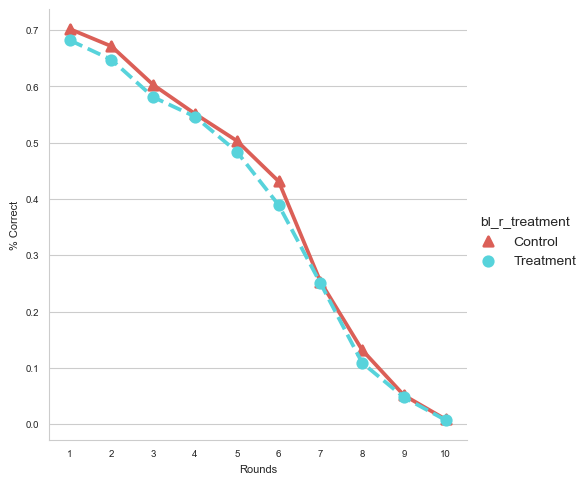

In [20]:
sns.set_palette("hls",2)
plt.rcParams["figure.autolayout"] =True
plt.rcParams["figure.figsize"]=[4,3]
sns.set_style("whitegrid")
sns.catplot(data=df_ct_tg, x='bl_ct_round_number', y="bl_ct_corr", hue='bl_r_treatment', markers=["^","o"], linestyles=["-","--"], kind="point")
#plt.title('Corsi-Block Test', fontsize=12)
plt.ylabel('% Correct', fontsize=8)
plt.xlabel('Rounds', fontsize=8)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
##legends
#h,l = ax.get_legend_handles_labels()
#col_lgd = plt.legend(loc='upper right')
#plt.gca().add_artist(col_lgd)
plt.savefig("ind_corsiblock_0.svg")
plt.show()

plt.close()

----------------------------------------------------------
#### HEARTS AND FLOWERS (STROOP) TEST

In [21]:
df_ht_1 = pd.merge(df_rs,df_cg_2, how='inner', left_on=["pid","bl_hhid"],right_on=["pid","bl_hhid"])
df_ht_1['bl_ht_corr']= df_ht_1['bl_ht_is_correct'].replace({'True':1, 'False':0})
print("--------" + "\n" + '\033[1m' +"Data: "+ '\033[0m' + 'CognitiveTask_HeartsAndFlowers_LRES_Baseline_Anon_V1.0.0.dta' + "\n")
df_ht_1.describe(exclude=[np.number])

--------
Data: CognitiveTask_HeartsAndFlowers_LRES_Baseline_Anon_V1.0.0.dta



,claim_id,bl_r_outcome,bl_r_treatment,bl_ht_outcome,bl_ht_date,bl_ht_version,bl_ht_time,bl_ht_round_number,bl_ht_is_practice,bl_ht_trial_time_limit,bl_ht_attempt_number,bl_ht_trial_count,bl_ht_trial_number,bl_ht_response_time,bl_ht_is_correct,bl_ht_include_hearts,bl_ht_include_flowers,bl_ht_displayed_symbol,bl_ht_displayed_symbol_name,bl_ht_displayed_side,bl_ht_displayed_side_name,bl_ht_selected_side,bl_ht_selected_side_name,bl_ht_expected_side,bl_ht_expected_side_name,bl_ht_corr
count,175484,175484,175484,175484,175484,175004.0,175484,175004.0,175484,175004.0,175004.0,175004.0,175004.0,175484,175484,175484,175484,175004.0,175484,175004.0,175484,175004.0,175484,175004.0,175484,175484
unique,97,1,2,2,152,1.0,903,9.0,3,1.0,4.0,5.0,40.0,583,3,3,3,2.0,3,2.0,3,3.0,4,2.0,3,3
top,663,Successfully Interviewed,Treatment,Test Completed,06/12/2018,0.0,08:54:37,9.0,False,750.0,1.0,20.0,1.0,Null,True,True,True,1.0,Flower,1.0,Left,0.0,None,1.0,Left,1
freq,23485,175484,94873,175004,7236,175004.0,804,52240.0,104480,175004.0,117035.0,78360.0,11754.0,55547,91174,130600,130600,87818.0,87818,87772.0,87772,80607.0,80607,87684.0,87684,91174


In [22]:
df_ht= df_ht_1[["bl_r_treatment",'bl_ht_round_number','bl_ht_corr']]
df_ht = df_ht.dropna()
df_ht = df_ht.astype({'bl_ht_round_number':'int','bl_ht_corr':'float',"bl_r_treatment":'category'})

df_ht_tg = df_ht.loc[:,['bl_r_treatment','bl_ht_round_number', 'bl_ht_corr']].groupby(['bl_r_treatment','bl_ht_round_number']).mean()
print("--------" + "\n" + '\033[1m' + 'Outcome (derived): ' + '\033[0m' + meta2.column_labels[(meta2.column_names).index('bl_ht_is_correct')]  + "\n")
df_ht_tg = df_ht_tg.reset_index(drop=False)
df_ht_tg

--------
Outcome (derived): Is Correct



,bl_r_treatment,bl_ht_round_number,bl_ht_corr
0,Control,1,0.772500
1,Control,2,0.628667
2,Control,3,0.631083
3,Control,4,0.715000
4,Control,5,0.587333
5,Control,6,0.558333
6,Control,7,0.678333
7,Control,8,0.396000
8,Control,9,0.406917
9,Treatment,1,0.821176


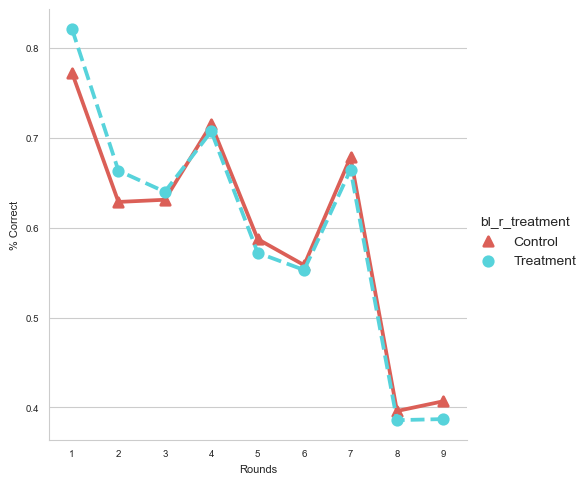

In [23]:
sns.set_palette("hls",2)
plt.rcParams["figure.autolayout"] =True
plt.rcParams["figure.figsize"]=[4,3]
sns.set_style("whitegrid")
sns.catplot(data=df_ht_tg, x='bl_ht_round_number', y="bl_ht_corr", hue='bl_r_treatment', markers=["^","o"], linestyles=["-","--"], kind="point")
#plt.title('Hearts and Flowers Test', fontsize=12)
plt.ylabel('% Correct', fontsize=8)
plt.xlabel('Rounds', fontsize=8)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
##legends
#h,l = ax.get_legend_handles_labels()
#col_lgd = plt.legend(loc='upper right')
#plt.gca().add_artist(col_lgd)
plt.savefig("ind_heartsflowers_0.svg")
plt.show()

plt.close()

----------------------------------------------------------
#### Ravens Progressive Matrix Test

In [24]:
df_rt_1 = pd.merge(df_rs,df_cg_3, how='inner', left_on=["pid","bl_hhid"],right_on=["pid","bl_hhid"])
df_rt_1['bl_rt_corr']= df_rt_1['bl_rt_is_correct'].replace({'True':1, 'False':0})
print("--------" + "\n" + '\033[1m' +"Test Data: "+ '\033[0m' + 'CognitiveTask_RavensPM_LRES_Baseline_Anon_V1.0.0.dta' + "\n")
df_rt_1.describe(exclude=[np.number])

--------
Test Data: CognitiveTask_RavensPM_LRES_Baseline_Anon_V1.0.0.dta



,claim_id,bl_r_outcome,bl_r_treatment,bl_rt_outcome,bl_rt_date,bl_rt_version,bl_rt_time,bl_rt_round_number,bl_rt_is_practice,bl_rt_trial_time_limit,bl_rt_attempt_number,bl_rt_trial_count,bl_rt_trial_number,bl_rt_response_time,bl_rt_is_correct,bl_rt_expected_answer_number,bl_rt_selected_answer_number,bl_rt_corr
count,17582,17582,17582,17582,17582,17228.0,17582,17228.0,17582,17228.0,17228.0,17228.0,17228.0,17582,17582,17228.0,17228.0,17582
unique,97,1,2,2,157,2.0,1052,11.0,3,1.0,4.0,2.0,10.0,2544,3,5.0,9.0,3
top,663,Successfully Interviewed,Treatment,Test Completed,06/12/2018,0.0,,2.0,False,0.0,1.0,10.0,1.0,Null,False,8.0,0.0,0
freq,2315,17582,9652,17228,648,15680.0,354,11562.0,14690,17228.0,10226.0,14690.0,2738.0,6066,12369,5676.0,6697.0,12369


In [25]:
df_rt= df_rt_1[["bl_r_treatment",'bl_rt_round_number','bl_rt_is_correct']]
df_rt = df_rt.dropna()
df_rt = df_rt.astype({'bl_rt_round_number':'int','bl_rt_is_correct':'float',"bl_r_treatment":'category'})

df_rt_tg = df_rt.loc[:,['bl_r_treatment','bl_rt_round_number', 'bl_rt_corr']].groupby(['bl_r_treatment','bl_rt_round_number']).mean()
print("--------" + "\n" + '\033[1m' + 'Outcome (derived): ' + '\033[0m' + meta3.column_labels[(meta3.column_names).index('bl_rt_is_correct')]  + "\n")
df_rt_tg = df_rt_tg.reset_index(drop=False)
df_rt_tg['bl_rt_round_number'] = df_rt_tg['bl_rt_round_number'].replace({16:8, 17:9})
df_rt_tg = df_rt_tg.dropna()
df_rt_tg

--------
Outcome (derived): Is Correct



,bl_r_treatment,bl_rt_round_number,bl_rt_corr
0,Control,1,0.428026
1,Control,2,0.224044
2,Control,3,0.209615
3,Control,4,0.500000
4,Control,5,0.340000
5,Control,6,0.000000
6,Control,7,0.000000
7,Control,8,0.500000
8,Control,9,0.600000
11,Treatment,1,0.424775


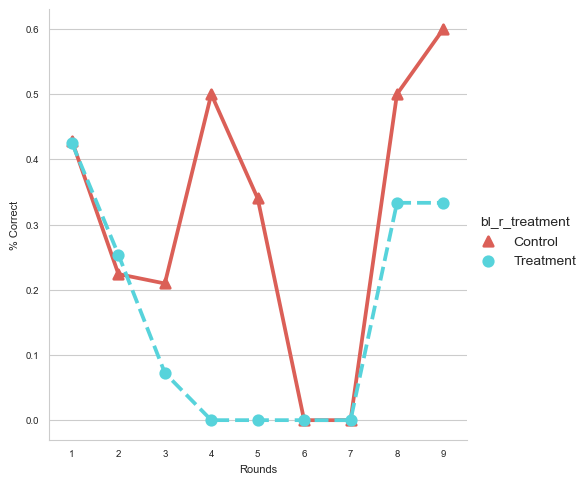

In [26]:
sns.set_palette("hls",2)
plt.rcParams["figure.autolayout"] =True
plt.rcParams["figure.figsize"]=[4,3]
sns.set_style("whitegrid")
sns.catplot(data=df_rt_tg, x='bl_rt_round_number', y="bl_rt_corr", hue='bl_r_treatment', markers=["^","o"], linestyles=["-","--"], kind="point")
#plt.title('Ravens Progressive Matrix Test', fontsize=12)
plt.ylabel('% Correct', fontsize=8)
plt.xlabel('Rounds', fontsize=8)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
##legends
#h,l = ax.get_legend_handles_labels()
#col_lgd = plt.legend(loc='lower right')
#plt.gca().add_artist(col_lgd)
plt.savefig("ind_ravens_0.svg")
plt.show()

plt.close()

-------------------------------------------------
#### TOWER OF LONDON TEST

In [27]:
df_tt_1 = pd.merge(df_rs,df_cg_4, how='inner', left_on=["pid","bl_hhid"],right_on=["pid","bl_hhid"])
df_tt_1['bl_tt_corr']= df_tt_1['bl_tt_is_correct'].replace({'True':1, 'False':0})
print("--------" + "\n" + '\033[1m' +"Test Data: "+ '\033[0m' + 'CognitiveTask_Towers_LRES_Baseline_Anon_V1.0.0.dta"' + "\n")
df_tt_1.describe(exclude=[np.number])

--------
Test Data: CognitiveTask_Towers_LRES_Baseline_Anon_V1.0.0.dta"



,claim_id,bl_r_outcome,bl_r_treatment,bl_tt_outcome,bl_tt_date,bl_tt_version,bl_tt_time,bl_tt_round_number,bl_tt_is_practice,bl_tt_trial_time_limit,bl_tt_attempt_number,bl_tt_trial_count,bl_tt_trial_number,bl_tt_response_time,bl_tt_is_correct,bl_tt_puzzle_name,bl_tt_first_input_delay,bl_tt_move_count,bl_tt_corr
count,15753,15753,15753,15753,15753,15240.0,15753,15240.0,15753,15240.0,15240.0,15240.0,15240.0,15753,15753,15753,15240.0,15240.0,15753
unique,97,1,2,2,152,1.0,878,2.0,3,1.0,2.0,2.0,10.0,2399,3,13,1330.0,20.0,3
top,663,Successfully Interviewed,Treatment,Test Completed,06/12/2018,0.0,,2.0,False,45000.0,1.0,10.0,1.0,Null,True,A3,0.0,0.0,1
freq,2091,15753,8532,15240,648,15240.0,513,12700.0,12700,15240.0,9997.0,12700.0,2540.0,5243,9264,1270,5434.0,5815.0,9264


In [28]:
df_tt= df_tt_1[["bl_r_treatment",'bl_tt_round_number','bl_tt_corr']]
df_tt = df_tt.dropna()
df_tt = df_tt.astype({'bl_tt_round_number':'int','bl_tt_corr':'float',"bl_r_treatment":'category'})

df_tt_tg = df_tt.loc[:,['bl_r_treatment','bl_tt_round_number', 'bl_tt_corr']].groupby(['bl_r_treatment','bl_tt_round_number']).mean()
print("--------" + "\n" + '\033[1m' + 'Outcome (derived): ' + '\033[0m' + meta4.column_labels[(meta4.column_names).index('bl_tt_is_correct')]  + "\n")
df_tt_tg = df_tt_tg.reset_index(drop=False)
#df_tt_tg['bl_tt_round_number'] = df_tt_tg['bl_tt_round_number'].replace({16:8, 17:9})
df_tt_tg = df_tt_tg.dropna()
df_tt_tg

--------
Outcome (derived): Is Correct



,bl_r_treatment,bl_tt_round_number,bl_tt_corr
0,Control,1,0.669811
1,Control,2,0.581304
2,Treatment,1,0.702329
3,Treatment,2,0.601019


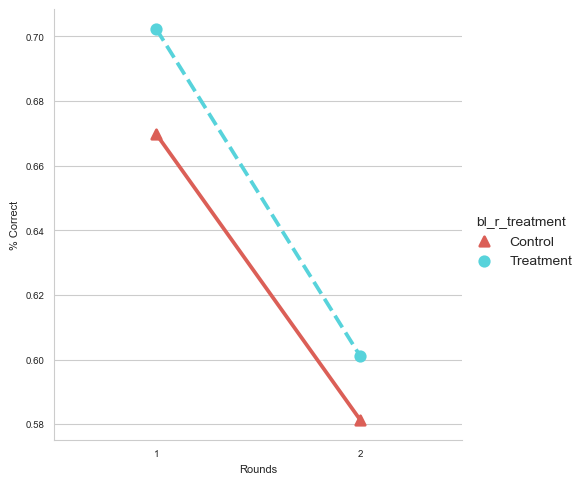

In [29]:
### sns.set_palette("hls",2)
plt.rcParams["figure.autolayout"] =True
plt.rcParams["figure.figsize"]=[4,3]
sns.set_style("whitegrid")
sns.catplot(data=df_tt_tg, x='bl_tt_round_number', y="bl_tt_corr", hue='bl_r_treatment', markers=["^","o"], linestyles=["-","--"], kind="point")
#plt.title('Tower of London Test', fontsize=12)
plt.ylabel('% Correct', fontsize=8)
plt.xlabel('Rounds', fontsize=8)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
##legends
#h,l = ax.get_legend_handles_labels()
#col_lgd = plt.legend(loc='lower right')
#plt.gca().add_artist(col_lgd)
plt.savefig("ind_tower_0.svg")
plt.show()

plt.close()

In [30]:
ws = pd.ExcelWriter('es_cg_2.xlsx', engine='xlsxwriter')
df_ct_tg.to_excel(ws, sheet_name='fig 2.21')
df_ht_tg.to_excel(ws, sheet_name='fig 2.22')
df_rt_tg.to_excel(ws, sheet_name='fig 2.23')
df_tt_tg.to_excel(ws, sheet_name='fig 2.24')
ws.save()


In [31]:
!jupyter-nbconvert --no-input --no-prompt --to html es_cg_1.ipynb

[NbConvertApp] Converting notebook es_cg_1.ipynb to html
[NbConvertApp] Writing 321492 bytes to es_cg_1.html
